In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('data/survey_2022.csv', low_memory= False)

In [3]:
fd = pd.read_csv('data/schema_2022.csv')

In [4]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [5]:
fd.head(7)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [6]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [7]:
fd.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [4]:
def informacion(preg):
    return fd.query('qname == "{}"'.format(preg))['question'].iloc[0]


# Salary
We are going to combine the 'CompTotal' and 'CompFreq' columns to get a total salary

In [8]:
dfsalary = df.copy()

In [9]:
dfsalary['CompTotal'].isna().sum()/dfsalary.shape[0]

0.47559644046514166

In [10]:
dfsalary['CompFreq'].isna().sum()/dfsalary.shape[0]

0.39366435551673307

We observe that more than 47 % of the data is missing. This is possibly caused because the employees didn't want to answer this question.
We are going to drop this registers.

In [11]:
dfsalary = dfsalary.dropna(subset=['CompTotal'], axis=0)

In [12]:
dfsalary['CompFreq'].isna().sum()/dfsalary.shape[0]

0.001952006662849409

A small porcentage of surveyed filled the 'CompTotal', but not the 'CompFreq'. Since it's a very small porcentage, we'll drop this data.

In [13]:
dfsalary = dfsalary.dropna(subset=['CompFreq'], axis=0)

In [14]:
dfsalary['CompTotal'].describe()

count    3.834700e+04
mean     2.347015e+52
std      4.595966e+54
min      0.000000e+00
25%      3.000000e+04
50%      7.800000e+04
75%      1.540000e+05
max      9.000000e+56
Name: CompTotal, dtype: float64

Ve can see there are extreme values that have no sense: $9 \cdot 10^{56}$ \\$

In [15]:
dfsalary['CompTotal'].sort_values(ascending=False)

35786    9.000000e+56
3068     1.000000e+52
70597    1.000000e+22
17567    1.000000e+15
19244    5.000000e+12
             ...     
45535    0.000000e+00
64715    0.000000e+00
3891     0.000000e+00
22777    0.000000e+00
56094    0.000000e+00
Name: CompTotal, Length: 38347, dtype: float64

Some employees report salaries too high to be true, and some of them report 0 \\$.
We are going to compute a new column for the total salary, by multiplying 'CompTotal' by 'CompFreq'.
In order to do so, we'll convert the frequency column into a dictionary with numerical values:
'Yearly':1, 'Monthly':12, 'Weekly':52
Then, we'll clean the extremes values.

In [16]:
dfsalary['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly'], dtype=object)

In [17]:
conversion = {'Yearly':1, 'Monthly':12, 'Weekly':52, np.nan:0}

In [18]:
dfsalary['CompFreq'] = dfsalary['CompFreq'].map(conversion)

In [19]:
dfsalary['Salary'] = df['CompTotal'] * dfsalary['CompFreq']

In [20]:
dfsalary[['CompTotal','CompFreq','Salary']]

,CompTotal,CompFreq,Salary
2,32000.0,1,32000.0
3,60000.0,12,720000.0
8,46000.0,1,46000.0
10,48000.0,1,48000.0
11,194400.0,1,194400.0
...,...,...,...
73259,8000.0,12,96000.0
73261,36000.0,1,36000.0
73263,60000.0,1,60000.0
73264,107000.0,1,107000.0


In [21]:
(dfsalary['Salary']==0).sum()

78

Hay 78 encuestados que reportan un sueldo de 0 $. Eliminemos estos registros.

In [22]:
dfsalary = dfsalary[dfsalary['Salary']>0]

In [23]:
dfsalary[['CompTotal','CompFreq','Salary']].describe()

,CompTotal,CompFreq,Salary
count,3.826900e+04,38269.000000,3.826900e+04
mean,2.351799e+52,6.344456,1.222936e+54
std,4.600647e+54,8.577074,2.392337e+56
min,1.000000e+00,1.000000,1.000000e+00
25%,3.000000e+04,1.000000,6.000000e+04
50%,7.800000e+04,1.000000,1.220000e+05
75%,1.550000e+05,12.000000,3.720000e+05
max,9.000000e+56,52.000000,4.680000e+58


Ahora vamos a limpiar los valores extremos superiores. El 75% de los datos son menores que 372.000 \\$
Así que centraremos nuestro estudio en el rango [0,600.000] $

In [24]:
dfsalary = dfsalary[dfsalary['Salary'] < 600000]

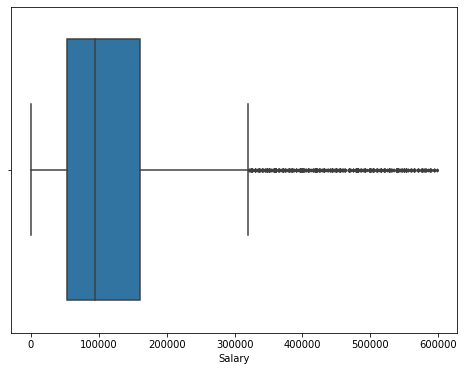

In [25]:
# plt.xlim((0,900000))
plt.figure(figsize=(8,6));
sns.boxplot(x = dfsalary['Salary'],fliersize=2);

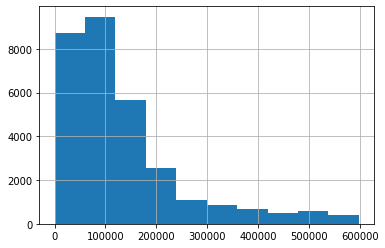

In [26]:
dfsalary['Salary'].hist();

In [27]:
dfsalary['Salary'].describe()

count     30542.000000
mean     130116.958811
std      115096.186261
min           1.000000
25%       53000.000000
50%       95000.000000
75%      160000.000000
max      598000.000000
Name: Salary, dtype: float64

In [23]:
dfsalary['EdLevel'].isna().sum()

14

Hay 14 registros sin Education level, los vamos a eliminar

In [24]:
# dfsalary = dfsalary.dropna(subset=['Edlevel'], axis=0)
dfsalary = dfsalary.dropna(subset=['EdLevel'])

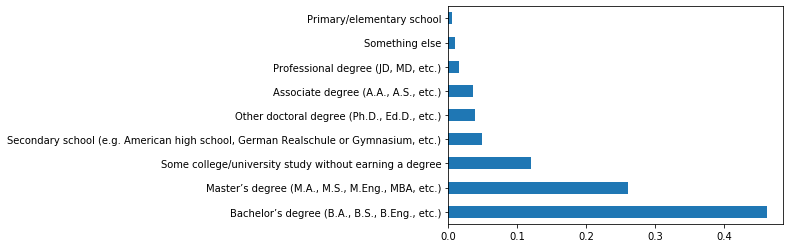

In [34]:
(dfsalary['EdLevel'].value_counts()/dfsalary.shape[0]).plot(kind='barh',);

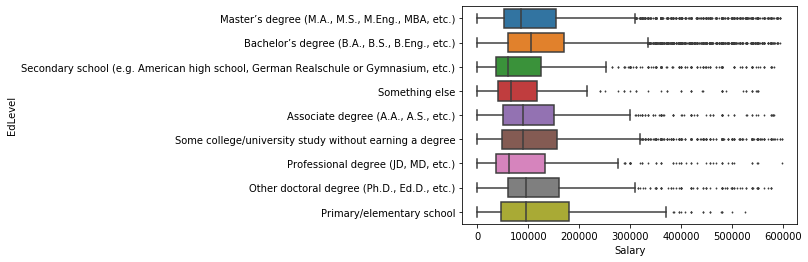

In [33]:
sns.boxplot(x=dfsalary['Salary'], y = dfsalary['EdLevel'],fliersize = 1);

In [36]:
recortado = list(dfsalary['EdLevel'].unique())
# recortado = []
for i,estudio in enumerate(dfsalary['EdLevel'].unique()):
    recortado[i] = estudio.split()[0] + ' ' + estudio.split()[1]
#     print(estudio)
recortado
def trans(texto):
    traduccion = {x:y for x,y in zip(list(dfsalary['EdLevel'].unique()),recortado)}
    return traduccion[texto]

In [ ]:
serie etiquetas = 

In [52]:
dfsalary['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [37]:
dfsalary['EdLevel'] = dfsalary['EdLevel'].apply(trans)

In [54]:
dfsalary['EdLevel'].nunique

<bound method IndexOpsMixin.nunique of 2          Master’s degree
8          Master’s degree
10       Bachelor’s degree
11       Bachelor’s degree
12       Bachelor’s degree
               ...        
73259      Master’s degree
73261      Master’s degree
73263    Bachelor’s degree
73264      Master’s degree
73266    Bachelor’s degree
Name: EdLevel, Length: 30528, dtype: object>

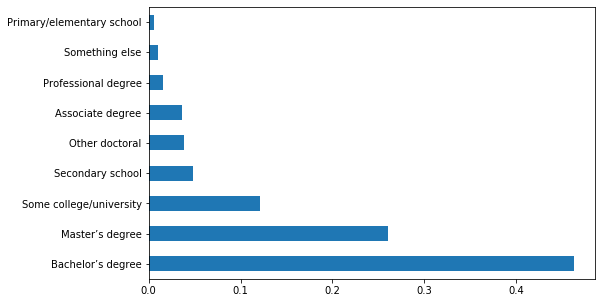

In [71]:
plt.figure(figsize=(8,5));
(dfsalary['EdLevel'].value_counts()/dfsalary.shape[0]).plot(kind='barh');

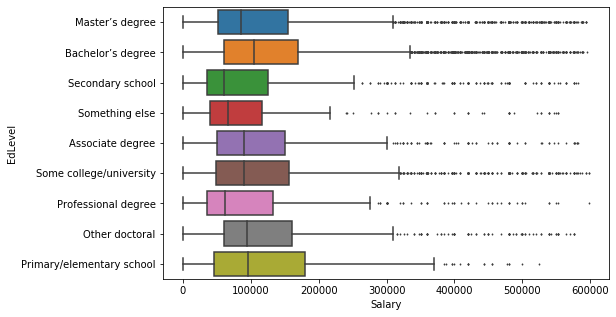

In [39]:
plt.figure(figsize=(8,5));
sns.boxplot(x=dfsalary['Salary'], y = dfsalary['EdLevel'],fliersize = 1);

## Remote work
We wanted to see how the situation was after the pandemic. And if remote work had become the norm.

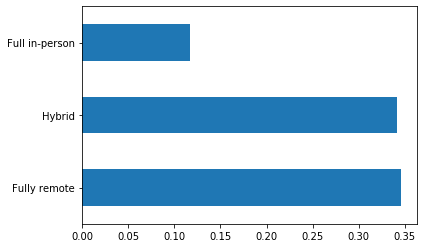

In [41]:
remoto = (df['RemoteWork'].value_counts()/df.shape[0])
remoto.index = ['Fully remote', 'Hybrid','Full in-person']
remoto.plot(kind= 'barh');

# Estudio de los años de experiecia con código

Podemos Comparar las columnas YearsCode y YearsCodePro para ver de media cuánto pasaron de estudiar a ser profesionales.

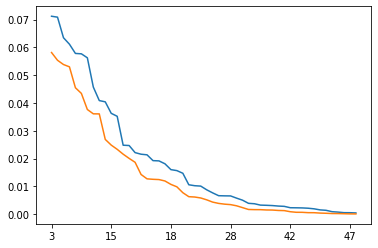

In [42]:
programando = df.copy()
(programando['YearsCode'].value_counts()/programando.shape[0]).plot();
(programando['YearsCodePro'].value_counts()/programando.shape[0]).plot();

In [43]:
yearscode = programando['YearsCode'].value_counts()/programando.shape[0]
yearscodepro = programando['YearsCodePro'].value_counts()/programando.shape[0]

In [44]:
yearscode.index = ['10', '5', '6', '4', '7', '8', '3', '2', '12', '15', '20', '9', '11',
       '14', '13', '25', '1', '0', '16', '30', '22', '18', '17',
       '40', '24', '35', '23', '19', '26', '27', '21', '28', '32', '38', '37',
       '34', '36', '33', '42', '29', '50', '31', '45', '39',
       '41', '43', '44', '50', '46', '47', '48', '49']

In [45]:
yearscodepro.index =['3', '5', '2', '4', '10', '6', '7', '8', '1', '0', '15',
       '12', '9', '20', '11', '14', '22', '16', '13', '25', '18', '17', '30',
       '23', '24', '21', '19', '26', '27', '35', '28', '32', '40', '29', '33',
       '31', '34', '36', '37', '38', '42', '45', '39', '41',
       '50', '43', '44', '46', '48', '50', '47', '49']

### La idea es crear otra columna con la diferencia de años pro y años amateur

In [46]:
programando[['YearsCode','YearsCodePro']].head()

,YearsCode,YearsCodePro
0,NaN,NaN
1,NaN,NaN
2,14,5
3,20,17
4,8,3


#### Para esto tendremos que ocuparnos de algunos problemas:
- Valores nulos
- Valores str que no podemos restar

### Eliminamos valores nulos

In [47]:
programando = programando.dropna(subset=['YearsCode','YearsCodePro'])

### Transformamos valores que no podemos operar
- 'Less than 1 year' lo sustituyo por el valor **0.5**
- 'More than 50 years' lo sustituyo por el valor **50**

In [48]:
def traducir(valor):
    if valor == 'Less than 1 year':
        return '0'
    elif valor == 'More than 50 years':
        return '50'
    return valor

In [49]:
programando['YearsCode'] = programando['YearsCode'].apply(traducir)
programando['YearsCodePro'] = programando['YearsCodePro'].apply(traducir)

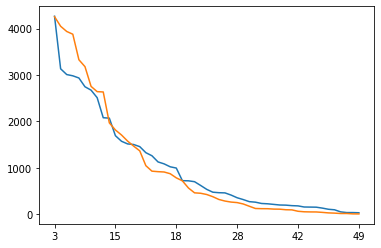

In [50]:
programando['YearsCode'].value_counts().plot();
programando['YearsCodePro'].value_counts().plot();

Vamos a crear una nueva columna resultante de restar las columnas `['YearsCode']` y `['YearsCodePro']`

Antes, comprobemos si hay algún valor donde alguien lleva más años programando como programador, que en total:

In [51]:
(programando['YearsCodePro'] > programando['YearsCode']).sum()

11811

In [52]:
programando['Diferencia'] = (programando['YearsCode'].astype('int32')  - programando['YearsCodePro'].astype('int32')).astype('object')

In [53]:
programando[programando['Diferencia'].astype('int32') < 0][['YearsCode','YearsCodePro','Diferencia']]

,YearsCode,YearsCodePro,Diferencia
259,9,11,-2
455,12,20,-8
911,2,3,-1
1309,12,22,-10
1585,4,15,-11
...,...,...,...
72662,4,5,-1
72720,3,4,-1
72949,2,5,-3
73078,10,13,-3


Dado que esos datos no tienen sentido, vamos a eliminarlos en nuestro gráfico

In [54]:
programando = programando[programando['Diferencia'].astype('int32') >= 0]

In [55]:
programando[['YearsCode','YearsCodePro','Diferencia']]

,YearsCode,YearsCodePro,Diferencia
2,14,5,9
3,20,17,3
4,8,3,5
8,6,6,0
9,37,30,7
...,...,...,...
73263,8,5,3
73264,6,5,1
73265,42,33,9
73266,50,31,19


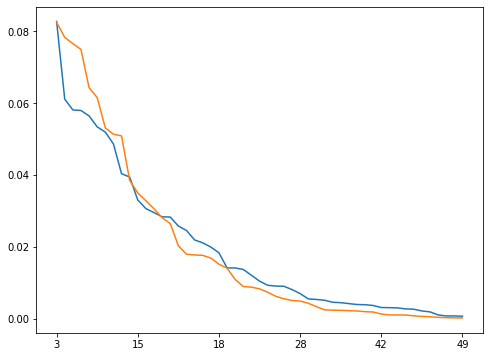

In [56]:
plt.figure(figsize=(8,6));
(programando['YearsCode'].value_counts()/programando.shape[0]).plot();
(programando['YearsCodePro'].value_counts()/programando.shape[0]).plot();


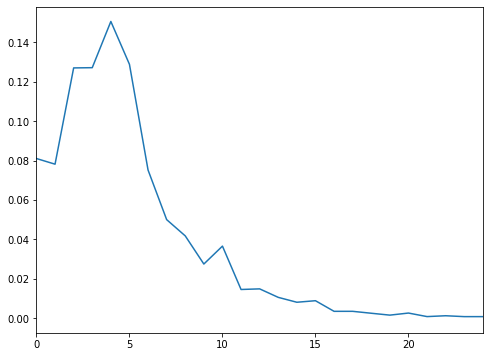

In [103]:
plt.figure(figsize=(8,6));
plt.xlim((0,24));
(programando['Diferencia'].value_counts().sort_index()/programando.shape[0]).plot();